# Markets analysis

Suppose we want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 200

fcc = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = 0)

Let's first take a look at the data

In [2]:
print(fcc.shape)
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Let's see what jobs these people are interested in.

In [3]:
fcc['JobRoleInterest'].value_counts(normalize = True)

Full-Stack Web Developer                                                                                                                                               0.117706
  Front-End Web Developer                                                                                                                                              0.064359
  Data Scientist                                                                                                                                                       0.021739
Back-End Web Developer                                                                                                                                                 0.020309
  Mobile Developer                                                                                                                                                     0.016733
                                                                                                                        

Some are interested in more than one job. Let's look at how many different roles a single person can be interested in.

In [4]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
split_interest = interests_no_nulls.str.split(',')

n_of_options = split_interest.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Our interest is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [5]:
#We search for people who are interested in either "Web Developer" or "Mobile Developer"
web_or_mobile = interests_no_nulls.str.contains(pat = 'Web Developer|Mobile Developer') 

#We see the % of True.
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


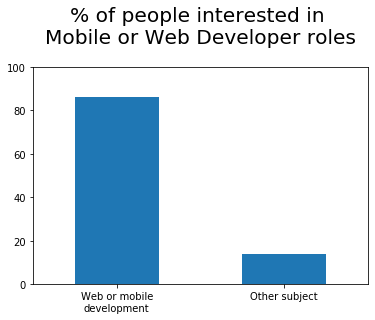

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


freq_table.plot.bar()
plt.style.use('fivethirtyeight')
plt.title("% of people interested in \nMobile or Web Developer roles", y = 1.08)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'], rotation = 0)
plt.ylim([0,100])
plt.show()

Clearly most people are interested in the roles that interest us.

In [7]:
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100

d = {'abs_freq': absolute_frequencies, 'rel_freq' : relative_frequencies}
df = pd.DataFrame(data=d)

df

,abs_freq,rel_freq
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Kyrgyzstan,1,0.014624
Gambia,1,0.014624
Qatar,1,0.014624
Angola,1,0.014624


USA and India are clearly the best markets.

In [8]:
# Replace 0s with 1s to avoid division by 0
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

# New column for the amount of money each student spends each month
fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

675

We keep only the rows that don't have null values for the money_per_month column, and contrylive column. And we look at the money_per_month on average for the countries the best countries.

In [9]:
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

countries_mean = fcc_good.groupby('CountryLive').mean()

countries_mean['money_per_month'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

### Outlying values

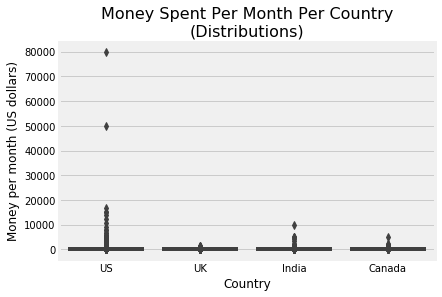

In [10]:
import seaborn as sns

top4 = fcc_good[fcc_good['CountryLive'].str.contains('India|United States of America|United Kingdom|Canada')]

sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = top4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


50k and 80k seems very high for US. So lets eliminate these values, and recompute to see the details better.

In [11]:
# Isolate only those participants who spend less than 20000 per month
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

In [12]:
# Recompute mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom','Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

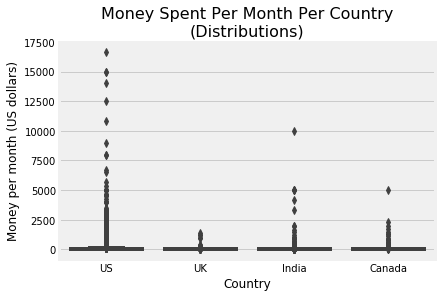

In [13]:
# Isolate again the countries of interest
top4 = fcc_good[fcc_good['CountryLive'].str.contains('India|United States of America|United Kingdom|Canada')]

sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = top4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [14]:
# Inspect the extreme outliers for India
india_outliers = top4[(top4['CountryLive'] == 'India') & (top4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

They don't seem to be relevant, there was no bootcamp explaining a high price.

In [15]:
# Remove the outliers for India
top4 = top4.drop(india_outliers.index) # using the row labels

In [16]:
# Examine the extreme outliers for the US
us_outliers = top4[
    (top4['CountryLive'] == 'United States of America') & 
    (top4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [17]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = top4[
    (top4['CountryLive'] == 'United States of America') & 
    (top4['money_per_month'] >= 6000) &
    (top4['AttendedBootcamp'] == 0)
]

top4 = top4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = top4[
    (top4['CountryLive'] == 'United States of America') & 
    (top4['money_per_month'] >= 6000) &
    (top4['MonthsProgramming'] <= 3)
]

top4 = top4.drop(less_than_3_months.index)

In [18]:
# Examine the extreme outliers for Canada
canada_outliers = top4[
    (top4['CountryLive'] == 'Canada') & 
    (top4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [19]:
# Remove the extreme outliers for Canada
top4 = top4.drop(canada_outliers.index)

In [20]:
# Recompute mean sum of money spent by students each month
top4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

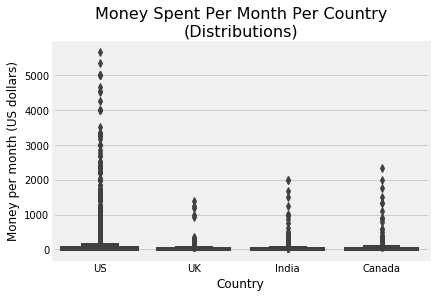

In [21]:
# Visualize the distributions again
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = top4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

### Choosing the best markets

In [22]:
# Frequency table for the 'CountryLive' column
top4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64